# BAR Vignette

In [1]:
# PyMC
import pymc as pm
print("PyMC version:", pm.__version__)

PyMC version: 5.22.0


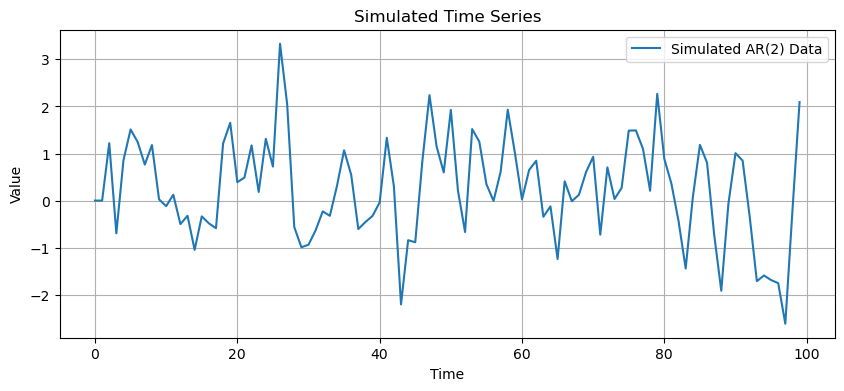

In [2]:
# Bayesian Autoregressive (BAR) Model Demonstration

# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
from bar import BAR

## Step 1: Generate synthetic time series data, or get real data.
np.random.seed(2102)
T = 100
phi_true = [0.6, -0.2]
sigma_true = 1.0

# Generate AR(2) data
y = [0, 0]
for t in range(2, T):
    y_t = phi_true[0]*y[-1] + phi_true[1]*y[-2] + np.random.normal(0, sigma_true)
    y.append(y_t)
y = np.array(y)

# Plot the simulated data
plt.figure(figsize=(10, 4))
plt.plot(y, label="Simulated AR(2) Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Simulated Time Series")
plt.legend()
plt.grid()
plt.show()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [phi, sigma]


c:\Users\alexd\anaconda3\envs\pymc_env\Lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.


array([[<Axes: title={'center': 'phi'}>, <Axes: title={'center': 'phi'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

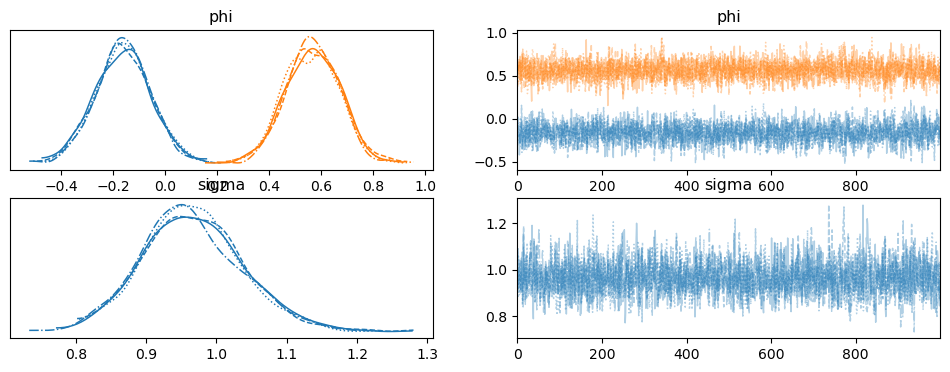

In [5]:
## Step 2: Initialize the BayesianAR model
# Note: For real data, you would pick p like you would with a standard AR model, typically via a model selection technique or exploratory analysis.
model = BAR(p=2)

## Step 3: Fit the model to the synthetic data
model.fit(y, draws=1000, tune=1000)

# Summary of posterior distribution
model.summary()

# Plot MCMC trace plots
model.plot_trace()

In [6]:
# Step 4: Forecast future points
n_forecast = 20
# forecasted_values = model.forecast(series[-3:], steps=n_forecast)

# Plot n-step forecast with 90% credible intervals
model.plot_forecast(steps=n_forecast, credible_interval=0.9)

# # Step 5: Visualize results
# plt.figure(figsize=(10, 4))
# plt.plot(series, label="Observed Data", marker='o')
# forecast_range = np.arange(n_points, n_points + n_forecast)
# plt.plot(forecast_range, forecasted_values, label="Forecasted Data", marker='o', linestyle='--')
# plt.xlabel("Time")
# plt.ylabel("Value")
# plt.title("Bayesian AR Forecast")
# plt.legend()
# plt.grid()
# plt.show()

AttributeError: 'BAR' object has no attribute 'y_fit'